# Jun Taek's Progress

I will be working on SVMs and artificial neural networks.

Changing directory for analysis.

In [325]:
import os
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd
import numpy as np

In [326]:
os.chdir("/Users/juntaeklee/Documents/Projects/UNMOdel/")
os.getcwd()

'/Users/juntaeklee/Documents/Projects/UNMOdel'

Opening xml and parsing data of UN data

# Importing Data

In [398]:
import wbdata 
indicators = {"IC.BUS.EASE.XQ": "doing_business", "NY.GDP.PCAP.PP.KD": "GDP per cap"}
df = wbdata.get_dataframe(indicators, convert_date=True)
df = df.reset_index()
df

,country,date,GDP per cap,doing_business
0,Arab World,2016-01-01,NaN,126.727273
1,Arab World,2015-01-01,15454.231911,126.909091
2,Arab World,2014-01-01,15299.087440,NaN
3,Arab World,2013-01-01,15206.856468,NaN
4,Arab World,2012-01-01,15018.352641,NaN
5,Arab World,2011-01-01,14577.135594,NaN
6,Arab World,2010-01-01,14490.196491,NaN
7,Arab World,2009-01-01,14159.605054,NaN
8,Arab World,2008-01-01,14224.249816,NaN
9,Arab World,2007-01-01,13705.208397,NaN


In [464]:
df = df.dropna(axis=0)
df.shape

(223, 225)

In [436]:
df = makecateg(df.dropna(axis=0))
df.shape
X = df.ix[1:200,0:5]
y = pd.DataFrame(np.zeros(100).tolist()+np.ones(100).tolist())
#y = pd.DataFrame()
test_X = df.ix[201:220,0:5]
test_y = pd.DataFrame(np.zeros(10).tolist()+np.ones(10).tolist())
#test_y = df.ix[500:1000,3]
test_X.shape,test_y.shape

((20, 5), (20, 1))

In [402]:
#Preprocessing data to convert categorical to binary

from sklearn import preprocessing
#lb = preprocessing.LabelBinarizer()
#lb.fit(newX.inewX[:,0])
#lb.classes_
#lb.transform(["Arab World"])

def makecateg(X):
    from sklearn import preprocessing
    newX = X.copy()
    columns = [str(cols) for cols in newX.select_dtypes(include=['dtype']).columns]
    if 'date' in [str(cols) for cols in newX.columns]:
        newX.date = newX.date.apply(lambda x: int(str(x)[:4]))
        newX.date = newX.date.astype(int)
    for cols in columns:
        lb = preprocessing.LabelBinarizer()
        lb.fit(newX.ix[:,0])
        classes = [str(classes) for classes in lb.classes_.copy().tolist()]
        dum = 0
        for cl in classes:
            newX[str(cl+'_'+cols)] = lb.transform(newX.ix[:,cols])[:,dum]
            dum += 1
        del newX[cols]
    columns = [str(cols) for cols in newX.columns.tolist()]
    for cols in columns:
        if 1 == len(newX[cols].unique()):
            del newX[cols]
    return newX.reset_index(drop=True)
    


## F_1 score Function

In [418]:
def f1score(model,test_X,test_y):
    predictions = model.predict(test_X).tolist()
    falsepos = int(predictions > test_y[0].tolist())
    falseneg = int(predictions < test_y[0].tolist())
    truepos = int(predictions == test_y[0].tolist())
    if truepos == 0:
        score = 0
        return score
    precision = float(truepos) / (truepos + falsepos)
    recall = float(truepos) / (truepos + falseneg)
    score = 2 * (precision * recall) / (precision + recall)
    return score

## Implementing SVM systems

In [437]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X,y)
svm_model.score(X,y)
svm_model.predict(test_X)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [404]:
svm_model = svm.SVR()
svm_model.fit(X,y)
svm_model.score(X,y)
svm_model.predict(test_X)

array([ 0.89960816,  0.50507691,  0.50507691,  0.50507691,  0.50507691,
        0.50507691,  0.50507691,  0.50507691,  0.50507691,  0.50507691,
        0.50507691,  0.50507691,  0.50507691,  0.50507691,  0.50507691,
        0.50507691,  0.50507691,  0.50507691,  0.50507691,  0.50507691,
        0.50507691])

### Checking various regularization parameters

In [438]:
def best_reg_SVM(X,y,test_X,test_y,model_type):
    C = [1, 1e-1,1e-2,1e-3,1e-4,1e-5]
    evalmet = []
    regs = []
    if model_type == "SVC":
        from sklearn import svm
        for reg in C:
            model = svm.SVC(C=reg)
            model.fit(X,y)
            evalmet.append(f1score(model,test_X,test_y))
            regs.append(reg)
        best_reg = regs[np.argmax(evalmet)]
        return best_reg
    if model_type == "SVR":
        from sklearn import svm
        for reg in C:
            model = svm.SVR(C=reg)
            model.fit(X,y)
            score = model.score(test_X,test_y)
            evalmet.append(score)
            regs.append(reg)
        print(evalmet)
        best_reg = regs[np.argmax(evalmet)]
        return best_reg
    else:
        return "Please use SVC or SVR!"
                    

In [439]:
best_reg_SVM(X,y,test_X,test_y,"SVC")

1

## Implementing Multilayer Perceptron (ANN)

In [440]:
from sklearn.neural_network import MLPClassifier
mlc_model = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (X.shape[0],2))
mlc_model.fit(X,y)
mlc_model.score(X,y)
mlc_model.predict(test_X)
f1score(mlc_model,test_X,test_y)

0

In [441]:
def best_layers(X,y,test_X,test_y,reg=1):
    evalmet = []
    layers = []
    from sklearn.neural_network import MLPClassifier
    for layer in range(1,4):
        model = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (pd.DataFrame(X).shape[0],layer),alpha = reg)
        model.fit(X,y)
        evalmet.append(f1score(model,test_X,test_y))
        layers.append(layer)
    best_layer = layers[np.argmax(evalmet)]
    return best_layer

def best_reg_MLP(X,y,test_X,test_y):
    alpha = [1, 1e1,1e2,1e3,1e4,1e5]
    evalmet = []
    regs = []
    from sklearn.neural_network import MLPClassifier
    for reg in alpha:
        model = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (pd.DataFrame(X).shape[0],2),alpha = reg)
        model.fit(X,y)
        evalmet.append(f1score(model,test_X,test_y))
        regs.append(reg)
    best_reg = regs[np.argmax(evalmet)]
    return best_reg

In [442]:
best_layers(X,y,test_X,test_y)
best_reg_MLP(X,y,test_X,test_y)

1

## Implementing Linear Regression

In [249]:
from sklearn import linear_model
lin_model = linear_model.Ridge(alpha = 0.5)
lin_model.fit(X,y)
lin_model.score(test_X,test_y)

0.71092256085079053

In [250]:
def best_reg_lin(X,y,test_X,test_y):
    alpha = [1,1e2,1e3,1e4,1e5,1e6]
    evalmet = []
    regs = []
    from sklearn import linear_model
    for reg in alpha:
        model = linear_model.Ridge(alpha = reg)
        model.fit(X,y)
        evalmet.append(model.score(test_X,test_y))
        regs.append(reg)
    best_reg = regs[np.argmax(evalmet)]
    return best_reg

In [251]:
best_reg_lin(X,y,test_X,test_y)

1000000.0

## Implementing Logistic Regression

In [443]:
from sklearn import linear_model
log_model = linear_model.LogisticRegression(solver='sag',C=1e5)
log_model.fit(X,y)
log_model.score(test_X,test_y)

0.5

In [444]:
def best_reg_log(X,y,test_X,test_y):
    C = [1,1e-2,1e-3,1e-4,1e-5,1e-6]
    evalmet = []
    regs = []
    from sklearn import linear_model
    for reg in C:
        model = linear_model.LogisticRegression(C = reg,solver='sag')
        model.fit(X,y)
        evalmet.append(model.score(test_X,test_y))
        regs.append(reg)
    best_reg = regs[np.argmax(evalmet)]
    return best_reg

In [445]:
best_reg_log(X,y,test_X,test_y)

1

# Learning Curves for Bias/Variance

In [121]:
#def learningcurve(X,y,test_X,test_y,model_choice,reg,n_jobs=4):
#    from sklearn.model_selection import learning_curve
#    X.append(test_X)
#    y.append(test_y)
#    if model_choice == "SVC":
#        from sklearn import svm
#        estimator = svm.SVC(C=reg)
#    elif model == "SVR":
#        from sklearn import svm
#        estimator = svm.SVC(C=reg)
#    elif model == "linear":
#        from sklearn import linear_model
#        estimator = svm.SVC(alpha=reg)
#    elif model == "logistic":
#        from sklearn import linear_model
#        estimator = svm.SVC(C=reg)
#    elif model == "MLP":
#        from sklearn.neural_network import MLPClassifier
#        estimator = svm.SVC(alpha=reg)
#    else:
#        return "Please choose between SVC, SVR, linear, logistic, MLP"
#    train_sizes, train_scores, test_scores = learning_curve(estimator,X, y,n_jobs=n_jobs)

In [446]:
#FROM 
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [449]:
estimator = linear_model.Ridge(alpha=0.5)
title = 'asdf'

In [450]:
plot_learning_curve(estimator, title, X, y)

<module 'matplotlib.pyplot' from '/Users/juntaeklee/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

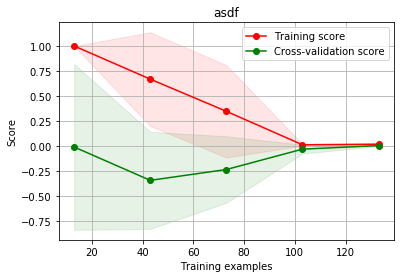

In [451]:
plt.show()

# Trying out xml file

In [456]:
import urllib 
from xml.dom import minidom
usock = urllib.urlopen('http://api.worldbank.org/indicators') 
usock

<addinfourl at 4548740088 whose fp = <socket._fileobject object at 0x10ec71250>>

In [463]:
import pandas as pd
import os
import urllib2
from BeautifulSoup import BeautifulSoup as BS
url2 = "/Users/juntaeklee/Documents/Projects/UNMOdel/indicators.xml"
html2 = urllib2.urlopen(url2)
soup2 = BS(html2)

ValueError: unknown url type: /Users/juntaeklee/Documents/Projects/UNMOdel/indicators.xml

In [462]:
import xmltodict

with open('/Users/juntaeklee/Documents/Projects/UNMOdel/indicators.xml') as fd:
    doc = xmltodict.parse(fd.read())

ImportError: No module named xmltodict